In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


#### Question 1: Example

In [3]:
### how many §purchases (rows in the table, not 'Quantity') were done by Male and Female customers?

#### Question 1 - Solution: Example

In [4]:
m_amount = len(df[df['Gender'] == 'Male'])
f_amount = len(df[df['Gender'] == 'Female'])

# do not print any intermediate results
# print *only your final* result in the form of a data frame (for clarity)

result = [('purchases by male', m_amount), ('purchases by female', f_amount)]
pd.DataFrame(result)

,0,1
0,purchases by male,498
1,purchases by female,502


#### Question 2

In [5]:
### what is the average Rating for products in the "Health and beauty" Product line?

#### Question 2 - Solution

In [6]:
# Filtering the DataFrame to include only rows where the 'Product line' is 'Health and beauty'
health_and_beauty_df = df[df['Product line'] == 'Health and beauty']

# Calculating the average rating for products in the "Health and beauty" product line
average_rating = health_and_beauty_df['Rating'].mean()

# Creating a DataFrame to display the result
result_df = pd.DataFrame({'Average Rating': [average_rating]})

result_df

,Average Rating
0,7.003289


#### Question 3

In [7]:
### how many products in each Product line were sold during the first week (days 1-7 including) of March 2019?
### use the 'Quantity' column for that purpose - the number of products purchased

#### Question 3 - Solution

In [8]:
# Defining the start and end dates for the first week of March 2019
first_day = "03/01/2019"
last_day = "03/07/2019"

# Filtering the DataFrame to include only rows within the specified date range
first_week_of_march_df = df[(df['Date'] >= first_day) & (df['Date'] <= last_day)]

# Grouping the data by 'Product line' and calculating the total quantity sold during the first week
product_line_quantities_df = first_week_of_march_df.groupby('Product line')['Quantity'].sum().reset_index()

product_line_quantities_df

,Product line,Quantity
0,Electronic accessories,100
1,Fashion accessories,56
2,Food and beverages,64
3,Health and beauty,94
4,Home and lifestyle,119
5,Sports and travel,80


#### Question 4

In [9]:
### plot a bar chart showing the number of products per category computed in the previous question

#### Question 4 - Solution

<Axes: xlabel='Product line'>

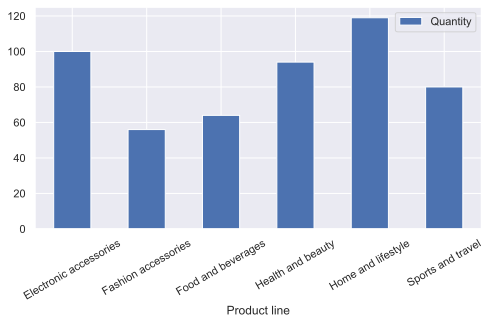

In [10]:
# Plotting a bar chart using the product_line_quantities_df DataFrame
product_line_quantities_df.plot(kind='bar', x='Product line', y='Quantity', rot=30)

#### Question 5

In [11]:
### plot the same bar chart as above - split by gender (male, female)
### the split bar chart is called stacked bar: look up "plot stacked bar charts from a dataframe" to see how to plot it

#### Question 5 - Solution

<Axes: title={'center': 'Quantity by Product Line and Gender'}, xlabel='Product line', ylabel='Quantity'>

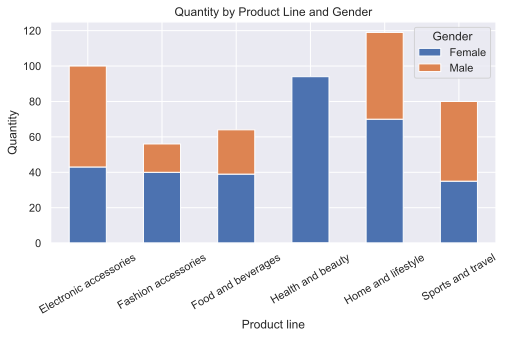

In [12]:
# Grouping the data by both 'Product line' and 'Gender', then unstacking the result
male_and_female_df = first_week_of_march_df.groupby(['Product line', 'Gender'])['Quantity'].sum().unstack()

# Plotting a stacked bar chart using the male_and_female_df DataFrame
male_and_female_df.plot(kind='bar', xlabel='Product line', ylabel='Quantity', title='Quantity by Product Line and Gender',
                        rot=30, stacked=True)

#### Question 6

In [13]:
### what is the total sales ('Total') done by each Payment type during the whole period?
### use the full data in the dataset (not the first week of March) from now on

#### Question 6 - Solution

In [14]:
# Grouping the data by 'Payment' and calculating the total sales ('Total') for each payment type
total_sales_by_payment_df = df.groupby(['Payment'])['Total'].sum().reset_index()

total_sales_by_payment_df

,Payment,Total
0,Cash,112206.570
1,Credit card,100767.072
2,Ewallet,109993.107


#### Question 7

In [15]:
### plot a chart with total sales ('Total') of the "Sports and travel" products by calendar week (Monday-Sunday): 
### note the first and the last week can be incomplete (for instance, the data starts on Wednesday, and ends on Friday)
### assume all our sales data spans the same year (for instance, 2019)

### you can make use of the isocalendar() function: https://www.geeksforgeeks.org/isocalendar-function-of-datetime-date-class-in-python/

### x axis are weeks enumerated from the first to the last calendar week in the data
### y axis is the total sales that week

#### Question 7 - Solution

<Axes: title={'center': 'Total Sales of "Sports and Travel" Products by Calendar Week'}, xlabel='Calendar Week (Monday-Sunday)', ylabel='Total Sales'>

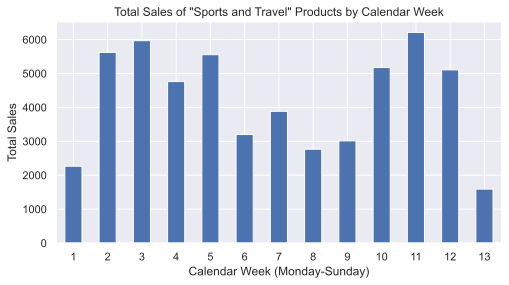

In [16]:
# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filtering the DataFrame to include only "Sports and travel" products
sports_and_travel_df = df[df['Product line'] == 'Sports and travel']

# Grouping the data by calendar week and calculating the total sales for "Sports and travel" products
weekly_sales = sports_and_travel_df.groupby(df['Date'].dt.isocalendar().week)['Total'].sum()

# Plotting a bar chart with total sales by calendar week
weekly_sales.plot(kind='bar', xlabel='Calendar Week (Monday-Sunday)', ylabel='Total Sales',
                  title='Total Sales of "Sports and Travel" Products by Calendar Week', rot=0)

#### Question 8

In [17]:
### plot a line chart of total sales ('Total') per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total amout of sales during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

#### Question 8 - Solution

C:\Users\USER\AppData\Local\Temp\ipykernel_8124\4262590522.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


<Axes: title={'center': 'Total Sales per Hour'}, xlabel='Hour of the Day', ylabel='Total Sales'>

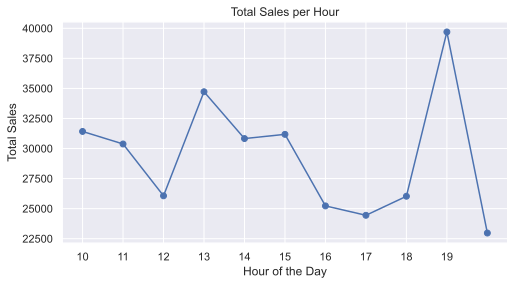

In [18]:
# Converting the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extracting the hour from the 'Time' column and creating a new 'Hour' column
df['Hour'] = df['Time'].dt.hour

# Grouping the data by hour and calculating the total sales for each hour
hourly_sales = df.groupby('Hour')['Total'].sum()

# Plotting a line chart with total sales per hour
hourly_sales.plot(kind='line', xlabel='Hour of the Day', ylabel='Total Sales', title='Total Sales per Hour',
                  xticks=range(10, 20), grid=True, marker='o')

#### Question 9

In [19]:
### plot a line chart of the total number of purchases (rows) per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total number of purchases during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

#### Question 9 - Solution

<Axes: title={'center': 'Total Number of Purchases per Hour'}, xlabel='Hour of the Day', ylabel='Total Number of Purchases'>

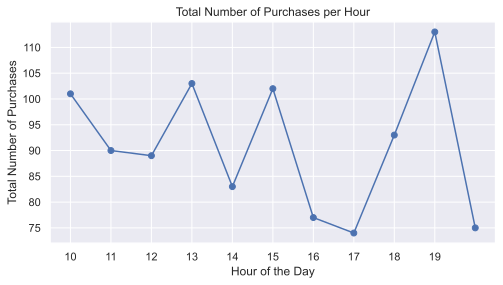

In [20]:
# Grouping the data by hour and calculating the total number of purchases (rows) for each hour
hourly_purchases = df.groupby('Hour').size()

# Plotting a line chart with the total number of purchases per hour
hourly_purchases.plot(kind='line', xlabel='Hour of the Day', ylabel='Total Number of Purchases',
                      title='Total Number of Purchases per Hour', xticks=range(10, 20), grid=True, marker='o')

#### Question 10

In [21]:
### what is the total income of strategic products by City?

### for each strategic product (as detailed in the product_types_strategy.csv file), 
###    display break down of total sales by cities - a table with three columns: 
###    (1) product line, (2) city and (3) total sales for that line in the city

#### Question 10 - Solution

In [22]:
# Reading the product types strategy data from the CSV file
strategic_df = pd.read_csv("product_types_strategy.csv")

# Renaming the column to match the DataFrame column name
strategic_df = strategic_df.rename(columns={'Product type': 'Product line'})

# Merging the main DataFrame with the strategic product types DataFrame
df_merged = pd.merge(df, strategic_df, on='Product line', how='left')

# Grouping the merged DataFrame by 'City' and 'Product line', then calculating the total sales for each group
total_sales_by_city_and_line = df_merged.groupby(['City', 'Product line'])['Total'].sum().unstack()

total_sales_by_city_and_line

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995
